<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/notebooks/avaliacao_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn_qqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import statsmodels.api as sm

In [ ]:
teste = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de resultados_test.csv')
val = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de resultados_val.csv')

In [ ]:
teste.head()

,Unnamed: 0,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock,name_brand_description,log_price,y_pred
0,0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,16-10-2018,18,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198
1,1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",9-7-2018,3,strapless backless push up lace up cupd No Bra...,2.397895,15.948566
2,2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,16-4-2018,37,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917
3,3,dermalogica gift set,Beauty,Makeup,Makeup Sets,1,No Brand,19.0,1,Brand new Authentic Includes: special cleansin...,9-9-2018,8,dermalogica gift set No Brand Brand new Authen...,2.944439,50.830850
4,4,reserved for monica only,Women,Shoes,Athletic,2,Nike,12.0,0,DO NOT PURCHASE THIS LISTING UNLESS YOU ARE MO...,3-8-2018,14,reserved for monica only Nike DO NOT PURCHASE ...,2.484907,51.066772


In [ ]:
val.head()

,Unnamed: 0,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock,name_brand_description,y_pred_val
0,0,la hoodie,Women,Sweaters,Hooded,2,No Brand,9.0,0,Brand new NWOT Never worn Smoke and pet free h...,31-1-2018,15,la hoodie No Brand Brand new NWOT Never worn S...,12.556984
1,1,earring backs,Women,Jewelry,Earrings,1,No Brand,3.0,1,All brand new soft runner I hand count them to...,21-12-2018,1,earring backs No Brand All brand new soft runn...,3.855730
2,2,rae dunn taste oval snack plate,Vintage & Collectibles,Housewares,Plate,1,Rae Dunn,30.0,0,Brand new ceramic Rae Dunn TASTE oval snack pl...,4-2-2018,6,rae dunn taste oval snack plate Rae Dunn Brand...,41.811333
3,3,lipstick bundle mac kat von d etc,Beauty,Makeup,Lips,3,Kat Von D,26.0,0,Maybelline Matte (Clay Crush) Maybelline Matte...,5-4-2018,12,lipstick bundle mac kat von d etc Kat Von D Ma...,21.896980
4,4,three piece outfit,Kids,Boys 0-24 Mos,Tops & T-Shirts,1,No Brand,3.0,1,Three piece outfit. Size 6 months. New with ta...,26-11-2018,3,three piece outfit No Brand Three piece outfit...,12.083473


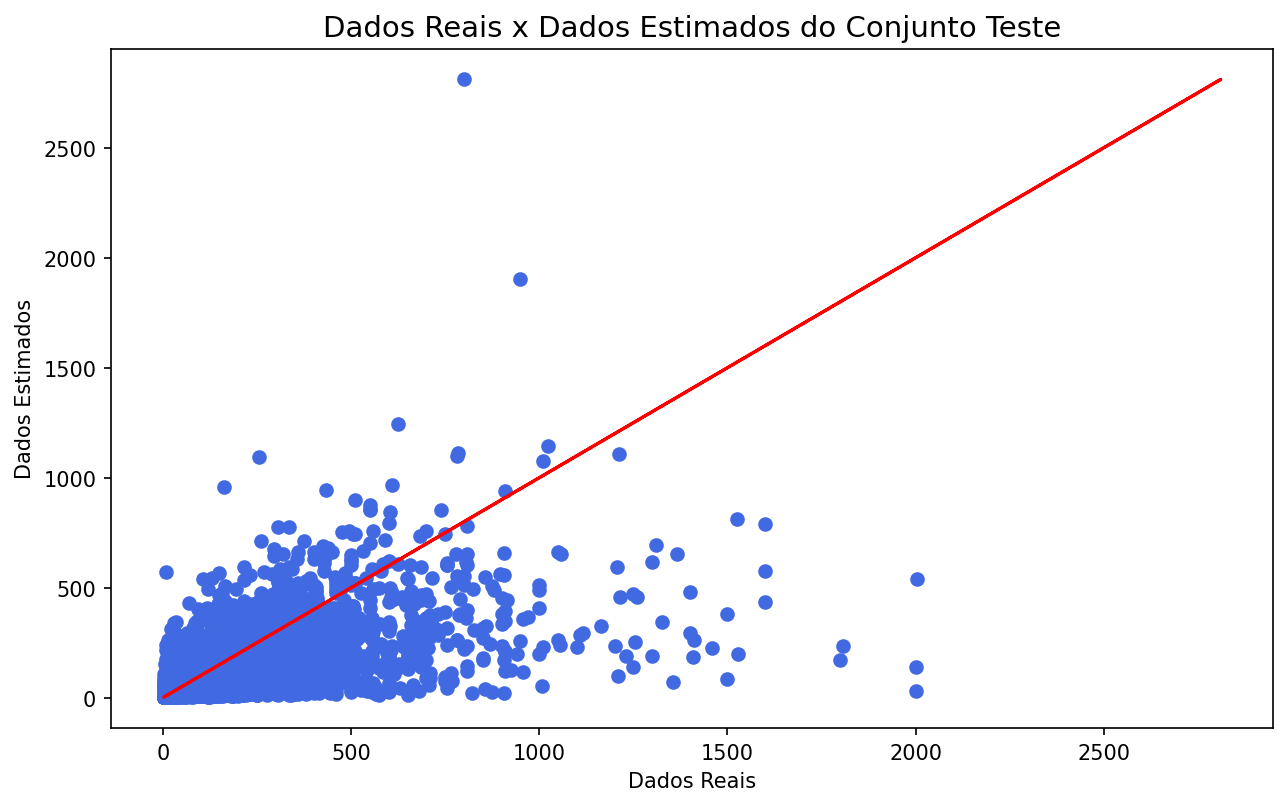

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Dados Reais x Dados Estimados do Conjunto Teste',fontsize=14)
plt.plot(teste.y_pred,teste.y_pred,color='red')
plt.scatter(teste.price,teste.y_pred,color='royalblue')
plt.xlabel('Dados Reais')
plt.ylabel('Dados Estimados');

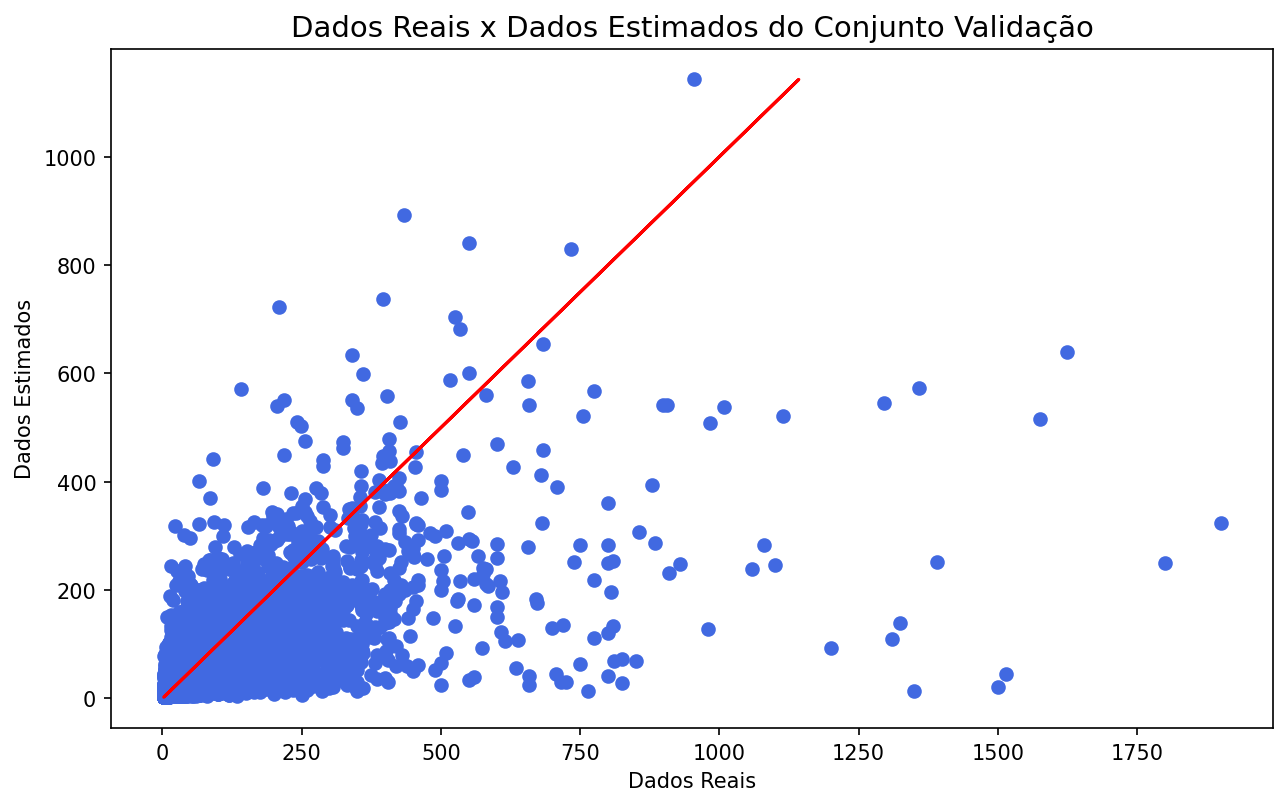

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Dados Reais x Dados Estimados do Conjunto Validação',fontsize=14)
plt.plot(val.y_pred_val,val.y_pred_val,color='red')
plt.scatter(val.price,val.y_pred_val,color='royalblue')
plt.xlabel('Dados Reais')
plt.ylabel('Dados Estimados');

In [ ]:
teste['dif'] = teste['y_pred']-teste['price']

In [ ]:
val['dif'] = val['y_pred_val'] - val['price']

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


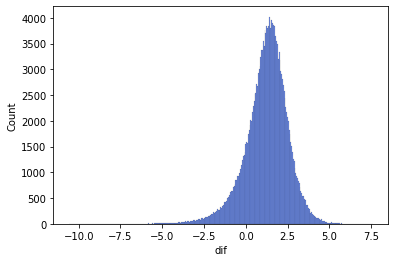

In [ ]:
sns.histplot(np.log(teste['dif']),color='royalblue')

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


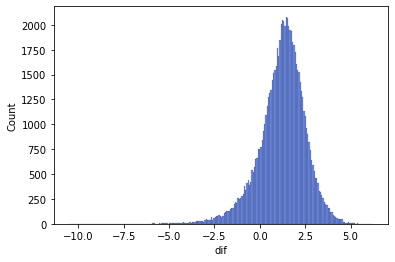

In [ ]:
sns.histplot(np.log(val['dif']),color='royalblue')

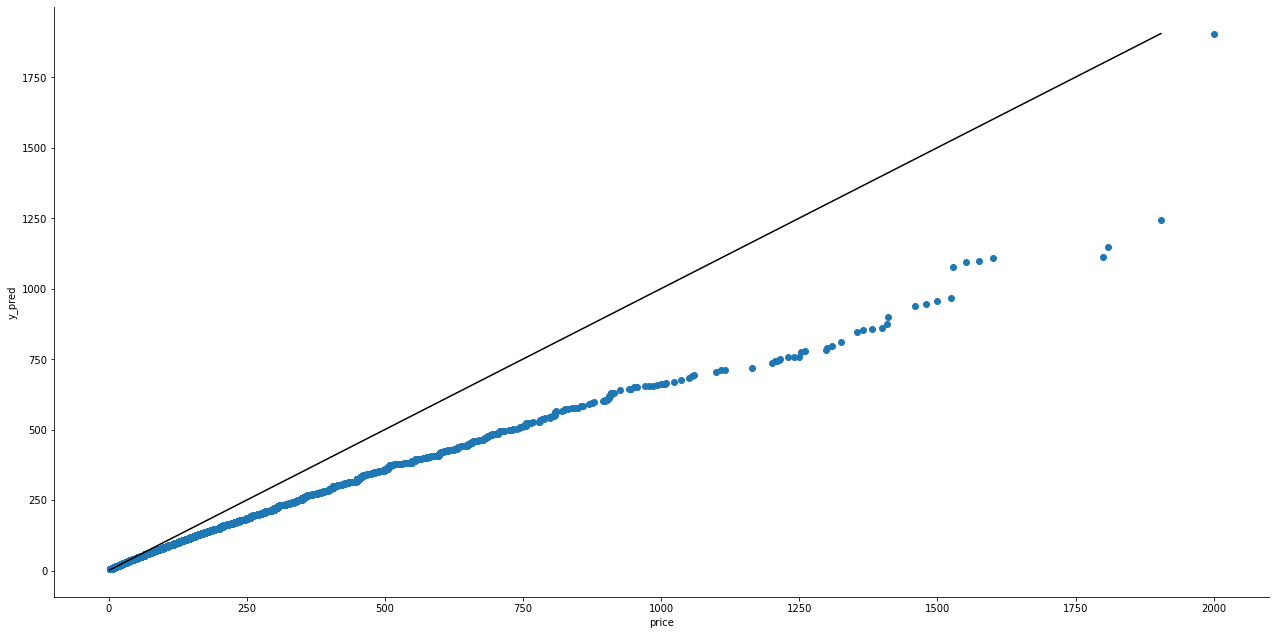

In [ ]:
pplot(teste,x='price',y='y_pred',kind='qq',height=9,aspect=2,display_kws={"identity":True})


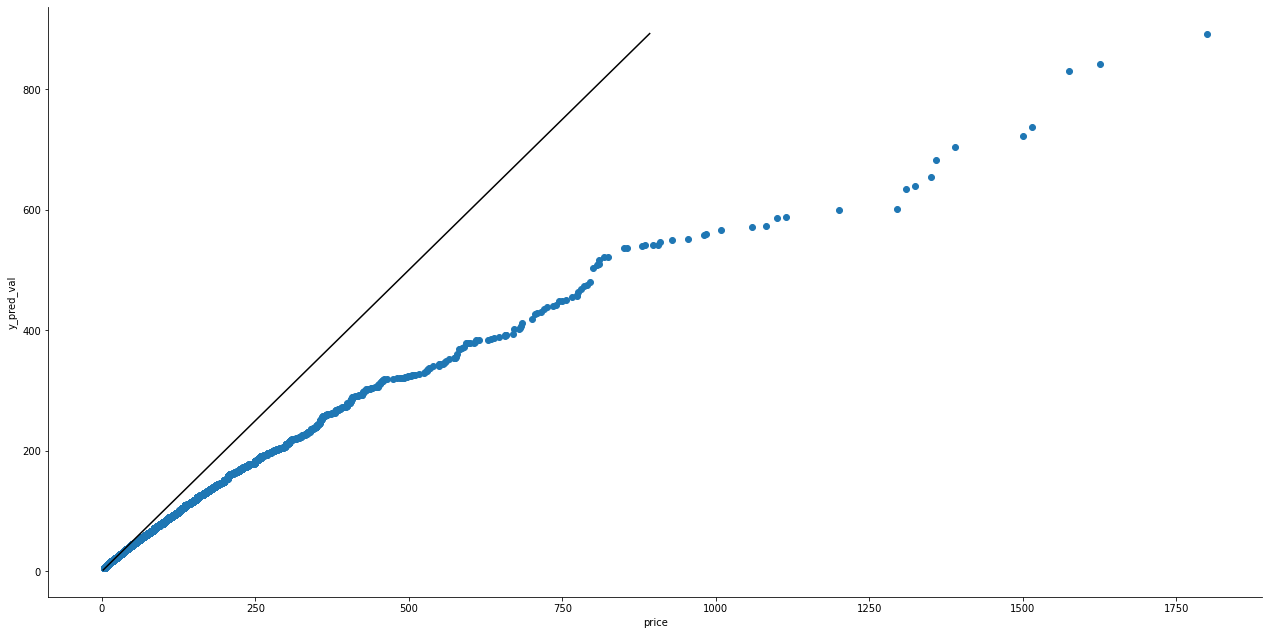

In [ ]:
pplot(val,x='price',y='y_pred_val',kind='qq',height=9,aspect=2,display_kws={"identity":True})

In [ ]:
teste.describe()

,Unnamed: 0,item_condition_id,price,shipping,stock,log_price,y_pred,dif
count,400049.000000,400049.000000,400049.000000,400049.000000,400049.000000,400049.000000,400049.000000,400049.000000
mean,200024.000000,1.906331,26.765256,0.446133,11.779939,2.913322,24.216750,-2.548506
std,115484.343257,0.903113,38.707158,0.497090,10.553873,0.788569,28.287655,25.710888
min,0.000000,1.000000,3.000000,0.000000,1.000000,1.098612,1.910462,-1971.251581
25%,100012.000000,1.000000,10.000000,0.000000,4.000000,2.302585,11.836501,-5.015560
50%,200024.000000,2.000000,17.000000,0.000000,9.000000,2.833213,16.943840,0.198302
75%,300036.000000,3.000000,29.000000,1.000000,17.000000,3.367296,26.688976,3.985123
max,400048.000000,5.000000,2004.000000,1.000000,91.000000,7.602900,2810.809800,2010.809800


In [ ]:
prox = teste[(teste['dif']>-20)&(teste['dif']<20)]
prox.head()

,Unnamed: 0,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock,name_brand_description,log_price,y_pred,dif
0,0,two headed dragon figure,Kids,Toys,Action Figures & Statues,3,Imperial,14.0,0,Vintage Imperial 1983 double headed green drag...,16-10-2018,18,two headed dragon figure Imperial Vintage Impe...,2.639057,13.210198,-0.789802
1,1,strapless backless push up lace up cupd,Women,Underwear,Bras,1,No Brand,11.0,1,"❤️All sizes are Available. Color(Beige,Black):...",9-7-2018,3,strapless backless push up lace up cupd No Bra...,2.397895,15.948566,4.948566
2,2,nike starter yankee romper,Kids,Boys 0-24 Mos,One-Pieces,2,Nike,7.0,1,Nike- New York Yankee romper. Size 6/9 months ...,16-4-2018,37,nike starter yankee romper Nike Nike- New York...,1.945910,11.958917,4.958917
5,5,dr martens,Women,Shoes,Boots,3,Dr. Martens,49.0,0,"Black Patent Leather, Women's Size 9, A little...",18-5-2018,11,"dr martens Dr. Martens Black Patent Leather, W...",3.891820,46.934740,-2.065260
6,6,nike leggings,Women,Athletic Apparel,"Pants, Tights, Leggings",4,Nike,12.0,1,No description yet,23-8-2018,10,nike leggings Nike No description yet,2.484907,11.333265,-0.666735


In [ ]:
prox.shape

(359415, 16)

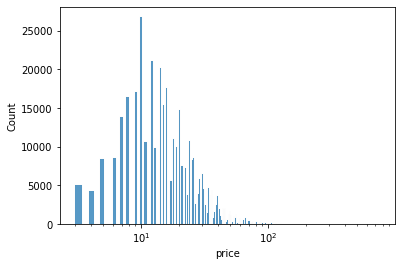

In [ ]:
sns.histplot(x='price',data=prox)
plt.xscale('log')

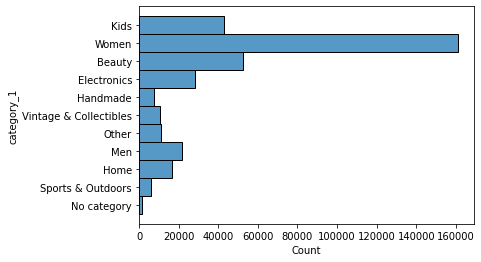

In [ ]:
sns.histplot(y='category_1',data=prox)